Using different public Kaggle Guides & notebooks for research and learning purposes I have
been able to understand and learn different concepts and techniques which I wrote in this notebook.

Credits to:

https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide
https://www.kaggle.com/code/adamml/my-spaceship-titanic-80-5
https://www.kaggle.com/code/odaymourad/detailed-and-typical-solution-ensemble-modeling
https://www.kaggle.com/code/usharengaraju/tensorflow-spaceship-neuraldecisionforests
https://www.kaggle.com/code/azminetoushikwasi/ml-foundation-imputation-all-techniques

In [ ]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
lis1 = api.competitions_list(search="Spaceship-Titanic")
api.competition_download_files('Spaceship-Titanic')

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [228]:

train_data = pd.read_csv("/Users/gorkagamo/PycharmProjects/Spaceship_Titanic/train.csv")
print("Train data imported succesfully")
print("-"*35)

test_data = pd.read_csv("/Users/gorkagamo/PycharmProjects/Spaceship_Titanic/test.csv")
print("Test data imported succesfully")

combine = [train_data, test_data]


Train data imported succesfully
-----------------------------------
Test data imported succesfully


In [229]:
print("Train Features are:\n")
print(train_data.columns.values)
print("-"*50)

print("Test Features are:\n")
print(test_data.columns.values)


Train Features are:

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']
--------------------------------------------------
Test Features are:

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name']


In [230]:
#check na & fill --> Homeplanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# We will use that later to handle missing values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [231]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [232]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [233]:
train_data["Transported"] = train_data["Transported"].astype(int)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [234]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [235]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


From .describe we discover the following:
mean from Transported or not (target) --> Is 50.36%
More than 50% of passengers are below 27 years old. More than 75% below 38 y/o.

In [236]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


No PassengerId duplicates.
20 Duplicate Names
Duplicate Cabins --> Multiple travelers sharing cabin / traveling together


Exploratory Data Analysis (EDA) :


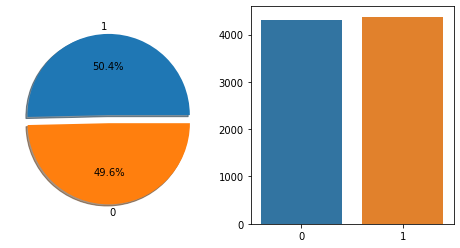

In [237]:
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Transported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Transported"] , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

--> 50.4% passengers transported.
--> 49.6% not transported.

Text(0.5, 0, 'Age (years)')

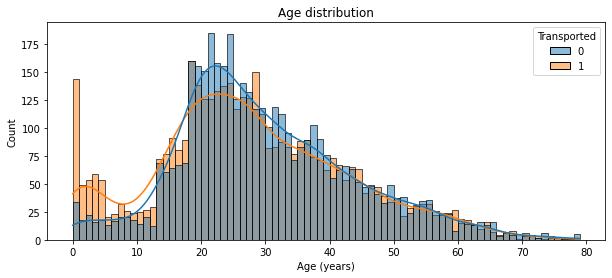

In [238]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_data, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age distribution')
plt.xlabel('Age (years)')


0 - 18 years more likely to be transported
18-40 more unlikely to be transported.
Over 40 years old equally likely to be transported.

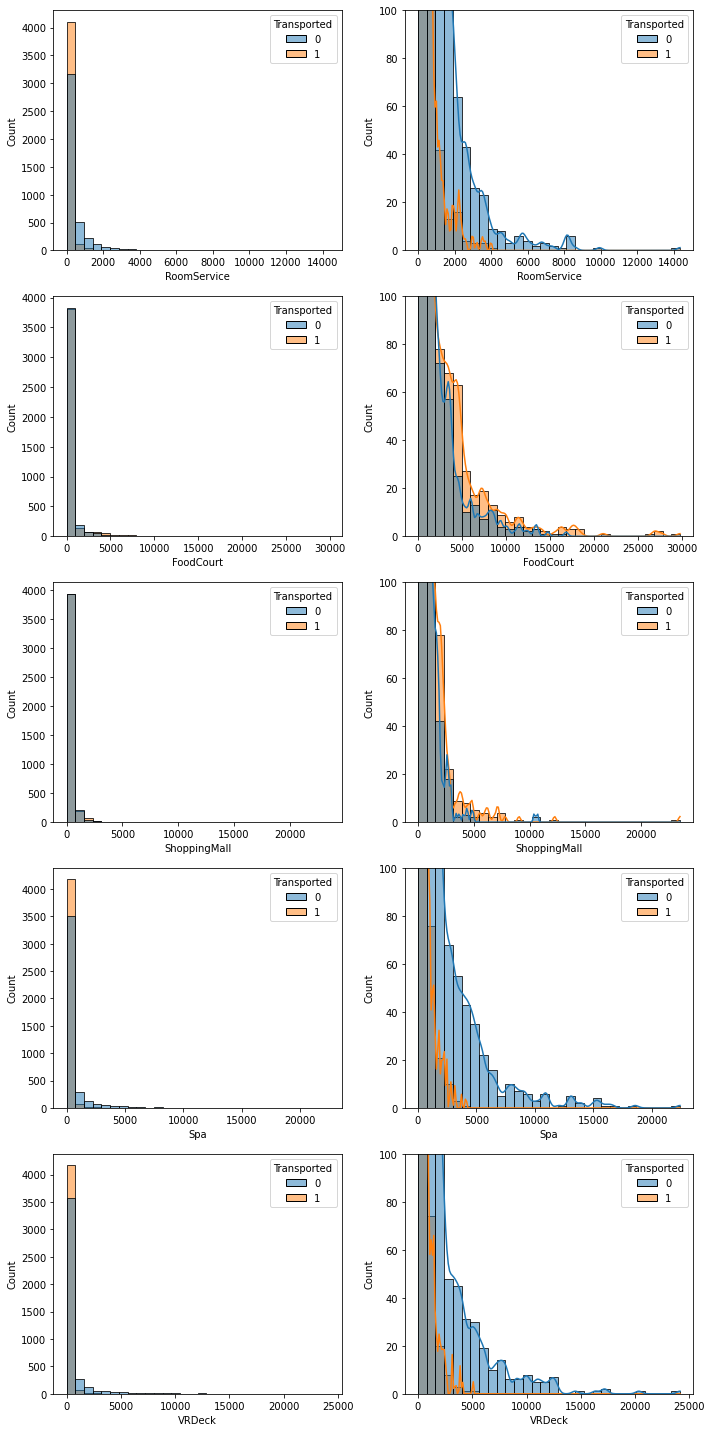

In [239]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):

    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')



    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])

fig.tight_layout()  # Improves appearance a bit
plt.show()


In [240]:
# Columns with missing values
na_cols=train_data.columns[train_data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train_data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


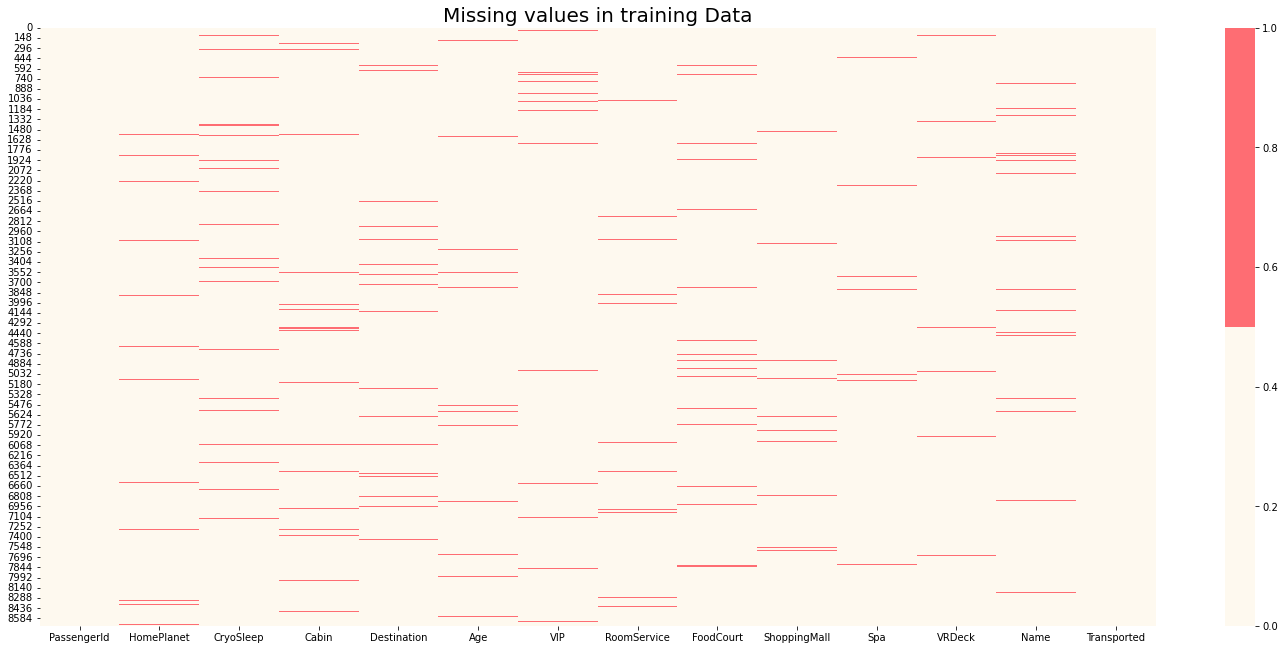

In [241]:
plt.figure(figsize = (25,11))
sns.heatmap(train_data.isna().values, cmap = ['#fef9ef','#fe6d73'], xticklabels=train_data.columns)
plt.title("Missing values in training Data", size=20);



Percentage is around 2% of missing data --> relatively small na data.
Heatmap shows us that there is no continuity in missing values.

There are infinite ways of handling missing values, and in order to maximize the models accuracy we have to look for patterns within the missing data.

Next versions will compare same models within more complex and useful ETL processes.

I will be using the median and the mode for continuous and categorical features.

This is called "FREQUENT CATEGORY IMPUTATION":
Assuming data is missing at random, and that there is a high probability that the missing data looks like the majority of the data.

Implementation is easy, a complete dataset is obtained in very little time.
However, if the percentage of missing values is high (not our case), the distortion will be higher.

In [242]:
NUMERIC_FEATURE_NAMES = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]

CATEGORICAL_FEATURE_NAMES1 = ["HomePlanet","CryoSleep","Destination","VIP"]

MissingValues =[]

MissingValues.append(NUMERIC_FEATURE_NAMES)
MissingValues.append(CATEGORICAL_FEATURE_NAMES1)

In [243]:
for feature in NUMERIC_FEATURE_NAMES:
    mean = train_data[feature].mean()
    train_data[feature] = train_data[feature].fillna(mean)

    meantest = test_data[feature].mean()
    test_data[feature] = test_data[feature].fillna(meantest)

In [244]:
for feature in CATEGORICAL_FEATURE_NAMES1:
    mode = train_data[feature].mode()
    train_data[feature] = train_data[feature].fillna(mode)

    modetest = test_data[feature].mode()
    test_data[feature] = test_data[feature].fillna(modetest)


In [245]:
train_data.drop(['Name'],axis =1,inplace= True)
test_data.drop(['Name'],axis =1,inplace= True)

In [246]:
na_cols=train_data.columns[train_data.isna().any()].tolist()
mv=pd.DataFrame(train_data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
VIP,203,2.34


In [247]:
mv=pd.DataFrame(test_data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(test_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
VIP,93,2.17


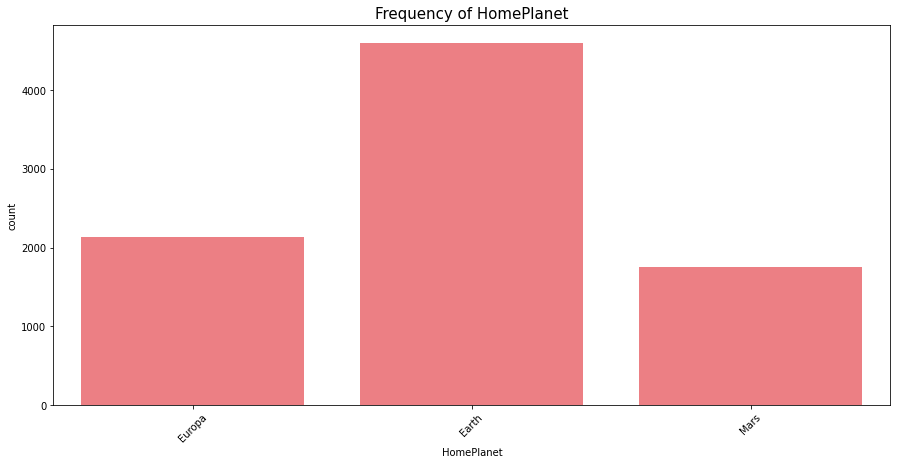

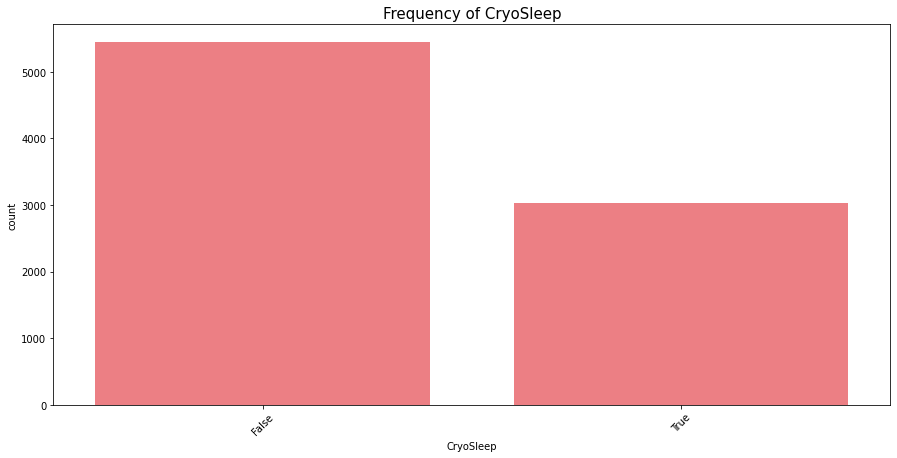

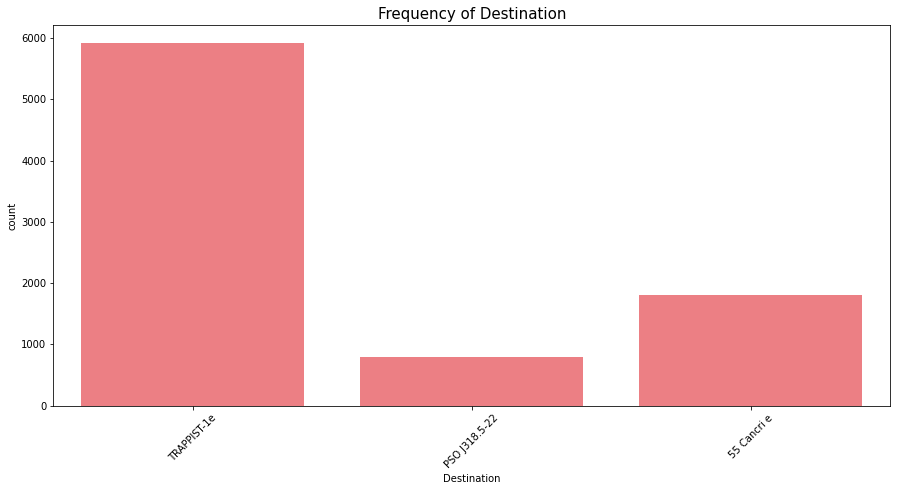

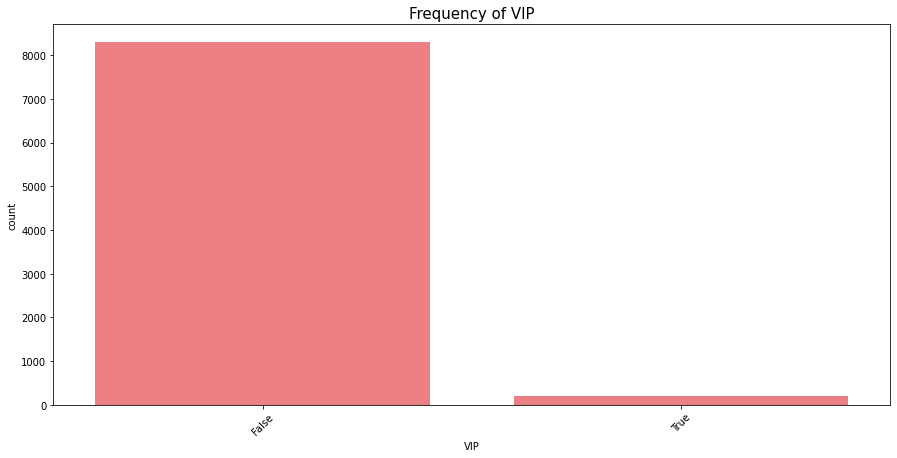

In [248]:
def countplot_features(df_train, feature, title):

    plt.figure(figsize = (15, 7))

    sns.countplot(df_train[feature], color = '#fe6d73')

    plt.title(title, fontsize=15)
    plt.xticks(rotation=45)
    plt.show();

# plot distributions of categorical features
for feature in CATEGORICAL_FEATURE_NAMES1:
    fig = countplot_features(train_data, feature=feature, title = "Frequency of "+ feature)


In [254]:
train_data.drop(['PassengerId', 'Cabin','CryoSleep','VIP'],axis =1 , inplace=True)
test_data.drop(['PassengerId', 'Cabin','CryoSleep','VIP'],axis = 1 ,inplace=True)
train_data.Transported.replace([True,False], ["1", "0"], inplace=True)

train_data["RoomService"].fillna(train_data["RoomService"].mean(skipna=True), inplace=True)
test_data["RoomService"].fillna(test_data["RoomService"].mean(skipna=True), inplace=True)

train_data["FoodCourt"].fillna(train_data["FoodCourt"].mean(skipna=True), inplace=True)
test_data["FoodCourt"].fillna(test_data["FoodCourt"].mean(skipna=True), inplace=True)

train_data["ShoppingMall"].fillna(train_data["ShoppingMall"].mean(skipna=True), inplace=True)
test_data["ShoppingMall"].fillna(test_data["ShoppingMall"].mean(skipna=True), inplace=True)

train_data["Spa"].fillna(train_data["Spa"].mean(skipna=True), inplace=True)
test_data["Spa"].fillna(test_data["Spa"].mean(skipna=True), inplace=True)

train_data["VRDeck"].fillna(train_data["VRDeck"].mean(skipna=True), inplace=True)
test_data["VRDeck"].fillna(test_data["VRDeck"].mean(skipna=True), inplace=True)

train_data["HomePlanet"].fillna('Kepler', inplace=True)
test_data["HomePlanet"].fillna('Kepler', inplace=True)

train_data["Destination"].fillna('TRAPPIST-1e', inplace=True)
test_data["Destination"].fillna('TRAPPIST-1e', inplace=True)

train_data.dropna(inplace = True)
test_data.dropna(inplace = True)



In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import layers

%matplotlib inline

from tensorflow.keras.layers import StringLookup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math